In [1]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../sales.csv')
df.head()

,Row ID,Order ID,Order Date,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,CG-12520,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,CG-12520,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,DV-13045,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,SO-20335,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,SO-20335,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
#drop unneed columns
df_clean = df.drop(columns=['Order ID', 'Row ID','Customer ID', 'Segment', 'City',  'Product ID', 'Product Name'], axis=1)
df_clean.head()

,Order Date,State,Region,Category,Sub-Category,Sales
0,08/11/2017,Kentucky,South,Furniture,Bookcases,261.9600
1,08/11/2017,Kentucky,South,Furniture,Chairs,731.9400
2,12/06/2017,California,West,Office Supplies,Labels,14.6200
3,11/10/2016,Florida,South,Furniture,Tables,957.5775
4,11/10/2016,Florida,South,Office Supplies,Storage,22.3680


In [4]:
#change to datetime
df_clean['Order Date']= pd.to_datetime(df['Order Date'])

In [5]:
#sort by dates
df_clean.sort_values(by =[ 'Region', 'Order Date'])

,Order Date,State,Region,Category,Sub-Category,Sales
540,2015-01-02,Wisconsin,Central,Technology,Accessories,468.900
6547,2015-01-03,Illinois,Central,Furniture,Chairs,634.116
6548,2015-01-03,Illinois,Central,Office Supplies,Paper,17.472
7947,2015-01-03,Texas,Central,Office Supplies,Fasteners,18.840
7948,2015-01-03,Texas,Central,Furniture,Chairs,362.250
...,...,...,...,...,...,...
5456,2018-12-29,Washington,West,Office Supplies,Fasteners,19.600
5457,2018-12-29,Washington,West,Furniture,Furnishings,68.460
1296,2018-12-30,California,West,Office Supplies,Binders,13.904
1297,2018-12-30,California,West,Office Supplies,Binders,20.720


In [6]:
#seperate into region
df_central = df_clean.loc[df_clean['Region']=='Central']


In [7]:
#seperate into regions

df_west = df_clean.loc[df_clean['Region']=='West']
df_south = df_clean.loc[df_clean['Region']=='South']
df_east = df_clean.loc[df_clean['Region']=='East']

In [8]:
#group by days and total sales for day
central = df_central.groupby(['Order Date']).sum().reset_index()
west = df_west.groupby(['Order Date']).sum().reset_index()
south = df_south.groupby(['Order Date']).sum().reset_index()
east = df_east.groupby(['Order Date']).sum().reset_index()

In [9]:
#reformat column headings to match prophet
central.rename(columns = {'Order Date':'ds', 'Sales':'y'}, inplace = True)
west.rename(columns = {'Order Date':'ds', 'Sales':'y'}, inplace = True)
east.rename(columns = {'Order Date':'ds', 'Sales':'y'}, inplace = True)
south.rename(columns = {'Order Date':'ds', 'Sales':'y'}, inplace = True)


In [10]:
central_model = Prophet().fit(central)
west_model = Prophet().fit(west)
east_model = Prophet().fit(east)
south_model = Prophet().fit(south)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
central_future = central_model.make_future_dataframe(periods=90)
west_future = west_model.make_future_dataframe(periods=90)
east_future = east_model.make_future_dataframe(periods=90)
south_future = south_model.make_future_dataframe(periods=90)

central_future.tail()

,ds
797,2019-03-26
798,2019-03-27
799,2019-03-28
800,2019-03-29
801,2019-03-30


In [12]:
central_forecast = central_model.predict(central_future)
central_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
#save to a csv
central_forecast.to_csv(r'../central_forecast.csv', index=False)

In [13]:
west_forecast = west_model.predict(west_future)
#save to a csv
west_forecast.to_csv(r'../west_forecast.csv', index=False)
west_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
921,2019-03-26,1276.470003,-284.531392,2797.660547
922,2019-03-27,1231.568703,-341.655366,2845.761778
923,2019-03-28,1103.660486,-360.288460,2750.518228
924,2019-03-29,1270.562976,-131.841331,2794.499456
925,2019-03-30,1234.497221,-246.858879,2652.102640


In [14]:
east_forecast = east_model.predict(east_future)
#save to a csv
east_forecast.to_csv(r'../east_forecast.csv', index=False)
east_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
865,2019-03-26,492.014720,-1267.119721,2239.898329
866,2019-03-27,388.976132,-1290.943224,2306.904887
867,2019-03-28,703.297147,-994.816429,2461.147912
868,2019-03-29,342.964237,-1503.104242,2123.000864
869,2019-03-30,667.636097,-1237.189847,2455.491084


In [15]:
south_forecast = south_model.predict(south_future)
#save to a csv
south_forecast.to_csv(r'../south_forecast.csv', index=False)
south_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
683,2019-03-25,1171.802618,-540.517531,2856.450554
684,2019-03-26,1171.878767,-399.708843,2860.942837
685,2019-03-27,1606.853018,-147.670066,3290.144233
686,2019-03-28,1226.940354,-394.917541,2921.430965
687,2019-03-29,995.283508,-547.824345,2735.032205


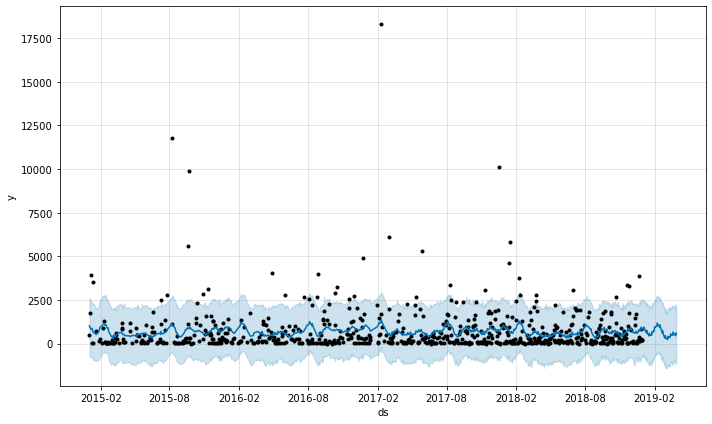

In [16]:
#plot the model for central region
fig1 = central_model.plot(central_forecast)


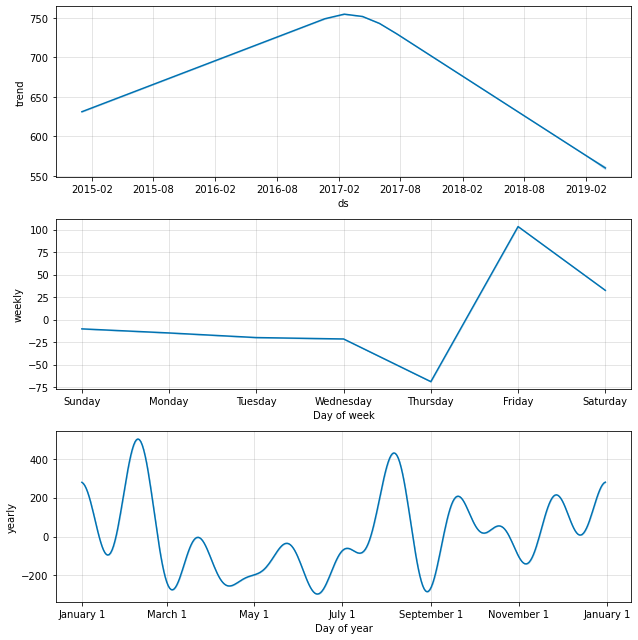

In [17]:

fig2 = central_model.plot_components(central_forecast)
